In [34]:
import pandas as pd
import numpy as np

#import pandas profiling
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('../../data/raw/DataTrain_Preliminary.csv',sep = ";")
df_test = pd.read_csv('../../data/raw/Data_Prediction.csv',sep = ";")
features = df.columns[0:-1]

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack
0,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.01,0.94,0.95,0,0.95,1,0,0,nmap
1,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.08,0.00,0,1.00,1,0,0,neptune
2,0,tcp,http,SF,285,3623,0,0,0,0,...,228,1.00,0.00,0.01,*,0.00,0,0,0,normal
3,0,tcp,http,SF,232,584,0,0,0,0,...,255,1.00,0.00,0.17,*,0.00,0,0,0,normal
4,1,tcp,smtp,SF,1080,327,0,0,0,0,...,154,0.58,0.02,0.00,*,0.00,0,0,0,normal


In [3]:
df = df.drop_duplicates(subset=features, keep=False)
df.shape

(110095, 42)

In [33]:
df.to_csv('../../data/interim/DataTrain_Preliminary_clean.csv', index=False)

In [6]:
df_toa_count

,type_of_attack,proportion
0,normal,0.545066
1,neptune,0.331804
2,ipsweep,0.025778
3,satan,0.025387
4,portsweep,0.023743
5,smurf,0.021454
6,Denial of Service Attack,0.015287
7,nmap,0.011481


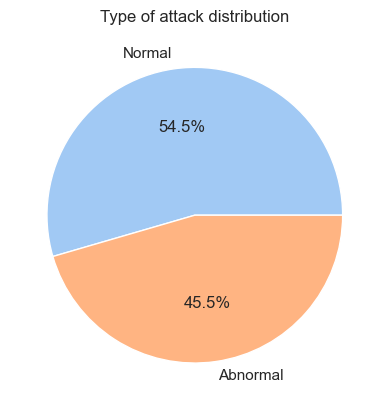

In [32]:
df['type_of_attack_general'] = df.type_of_attack.apply(lambda x: "Normal" if x == "normal" else "Abnormal")
plt.pie(df.type_of_attack_general.value_counts(), labels=df.type_of_attack_general.value_counts().index, autopct='%1.1f%%')
plt.title("Type of attack distribution");

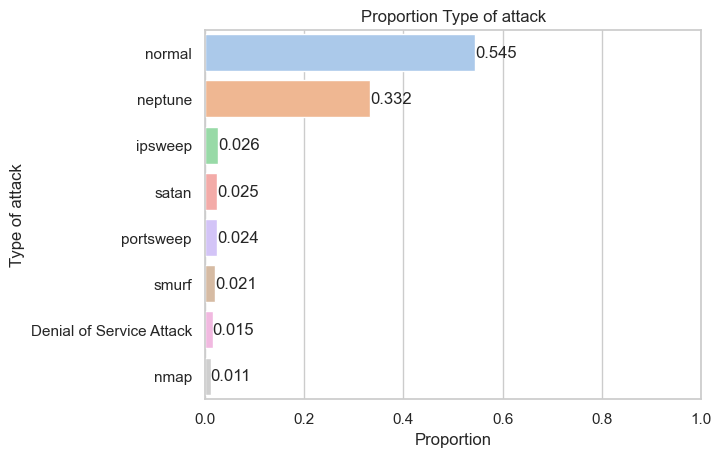

In [23]:
#countplot using plotly for type of attack
df_toa_count =  df['type_of_attack'].value_counts(normalize=True).reset_index()
df_toa_count['proportion'] = df_toa_count.proportion.apply(lambda x: round(x,3))
sns.set_theme(style="whitegrid",palette="pastel")
ax = sns.barplot(x='proportion', y='type_of_attack', data=df_toa_count)
ax.bar_label(ax.containers[0])
plt.xlim(0,1)
plt.xlabel('Proportion')
plt.ylabel('Type of attack')
plt.title('Proportion Type of attack');

# Missing Value

# Type of attack

In [3]:
df['type_of_attack_general'] = df.type_of_attack.apply(lambda x: "Normal" if x == "normal" else "Abnormal")

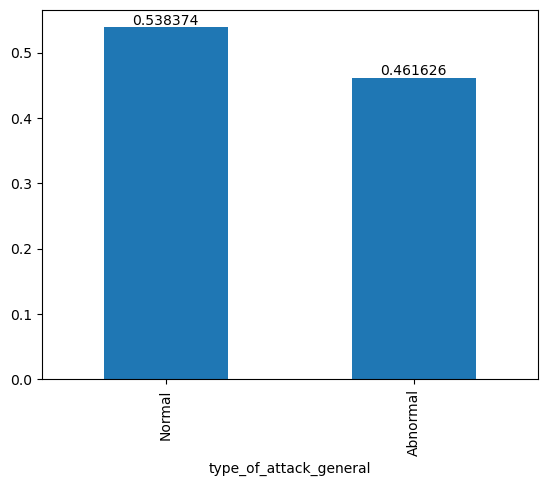

In [4]:
ax = df['type_of_attack_general'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0]);

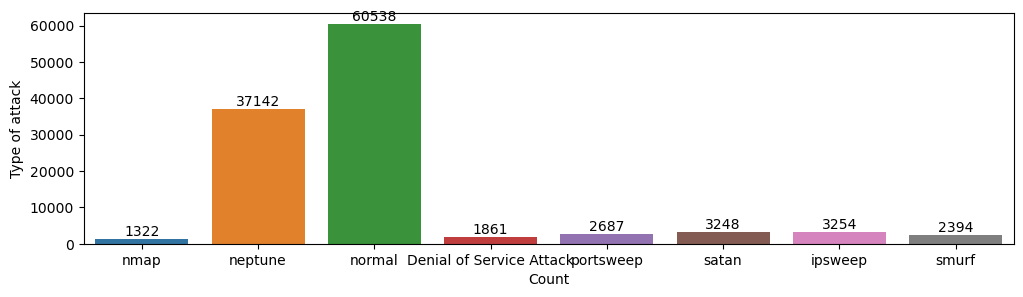

In [5]:
#plot pie chart type of attack
plt.figure(figsize=(12,3))
ax = sns.countplot(x = df.type_of_attack)
ax.bar_label(ax.containers[0])
# show label count
plt.xlabel("Count")
#add data label
plt.ylabel("Type of attack")
plt.show()

# duration

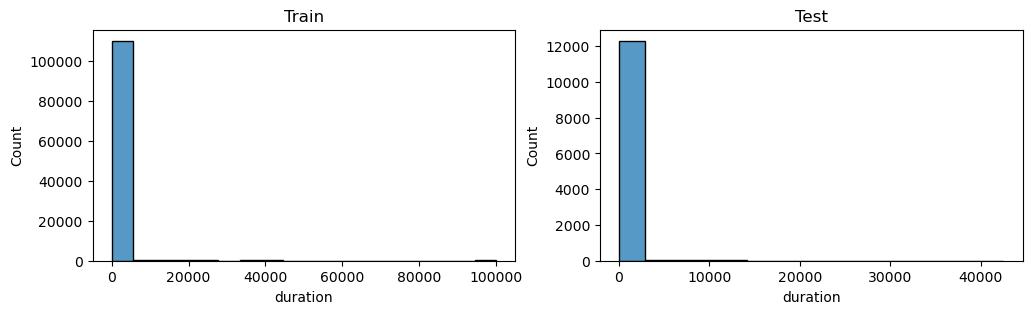

In [7]:
#make subplots
df.duration = df.duration.replace("*",np.nan)
df.duration = df.duration.astype(float)
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.histplot(df.duration,ax=ax[0])
sns.histplot(df_test.duration,ax=ax[1])
#set left title and right title
ax[0].set_title('Train')
ax[1].set_title('Test');

<Axes: xlabel='duration', ylabel='type_of_attack_general'>

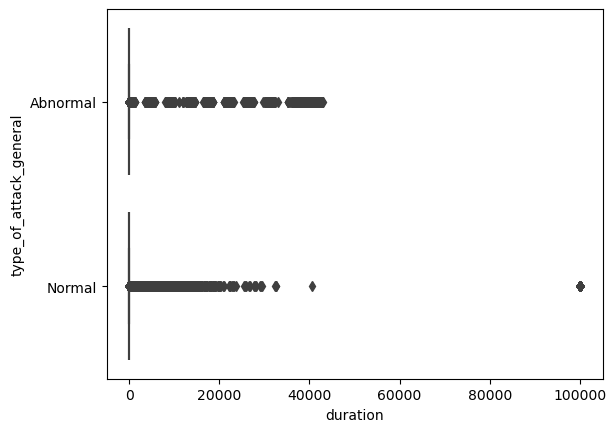

In [8]:
sns.boxplot(y = df.type_of_attack_general, x=df.duration)

ada pola di duration pada koneksi yang abnormal, coba di cek tiap bin nya

# Protocol Type

In [9]:
df.protocol_type.value_counts()

protocol_type
tcp     90997
udp     13364
icmp     7417
Name: count, dtype: int64

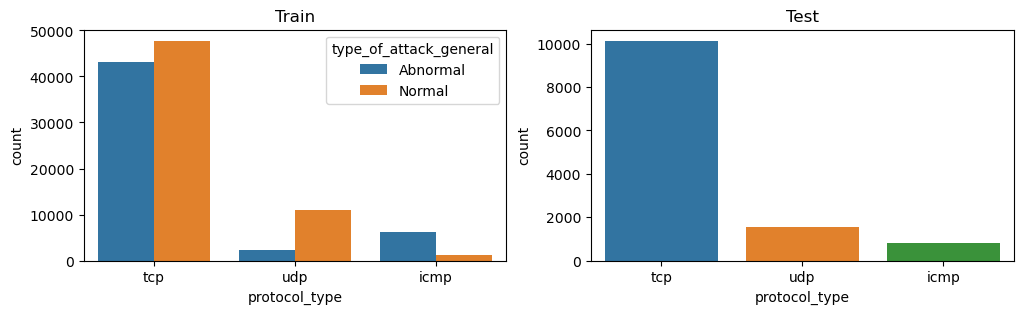

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.countplot(x = df.protocol_type, ax=ax[0],hue = df.type_of_attack_general)
sns.countplot(x = df_test.protocol_type, ax=ax[1])
ax[0].set_title('Train')
ax[1].set_title('Test');

# Service Type

In [11]:
#sort np.unique(df.service)
df.service.value_counts()

service
http         36013
private      19415
domain_u      8041
smtp          6563
ftp_data      5558
             ...  
tftp_u           3
aol              2
http_8001        1
harvest          1
http_2784        1
Name: count, Length: 70, dtype: int64

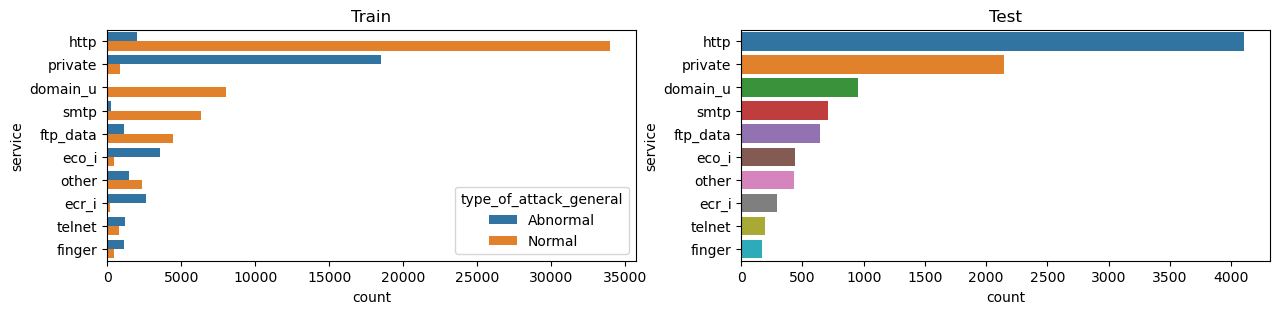

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,3))
#show top 10 service
sns.countplot(y = df.service, ax=ax[0],hue = df.type_of_attack_general,order = df.service.value_counts().iloc[:10].index)
sns.countplot(y = df_test.service, ax=ax[1],order = df_test.service.value_counts().iloc[:10].index)
ax[0].set_title('Train')
ax[1].set_title('Test');

# Flag

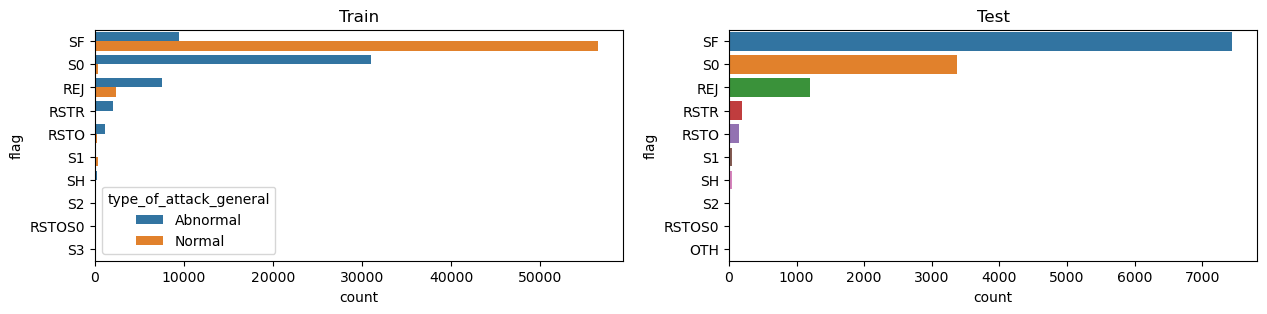

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,3))
#show top 10 service
sns.countplot(y = df.flag, ax=ax[0],hue = df.type_of_attack_general,order = df.flag.value_counts().iloc[:10].index)
sns.countplot(y = df_test.flag, ax=ax[1],order = df_test.flag.value_counts().iloc[:10].index)
ax[0].set_title('Train')
ax[1].set_title('Test');

bisa diringkas kategorinya, terutama yang tidak terlalu banyak, seperti S1,S2,S3 dijadikan 1, RSTOS0 digabung dengan RSTO dan RSTR, OTH masukan ke RSTO

In [14]:
df.flag.nunique()
df_test.flag.nunique()

11

# Src Bytes

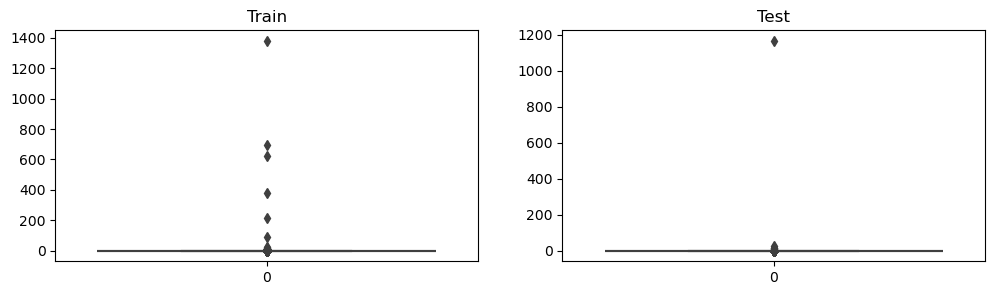

In [15]:
#make subplots
df.src_bytes = df.src_bytes.replace('*',np.nan)
df.src_bytes = df.src_bytes.astype(float)
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.boxplot(df.src_bytes.apply(lambda x: x/1000000),ax=ax[0])
sns.boxplot(df_test.src_bytes.apply(lambda x: x/1000000),ax=ax[1])
#set left title and right title
ax[0].set_title('Train')
ax[1].set_title('Test');

# dst_bytes

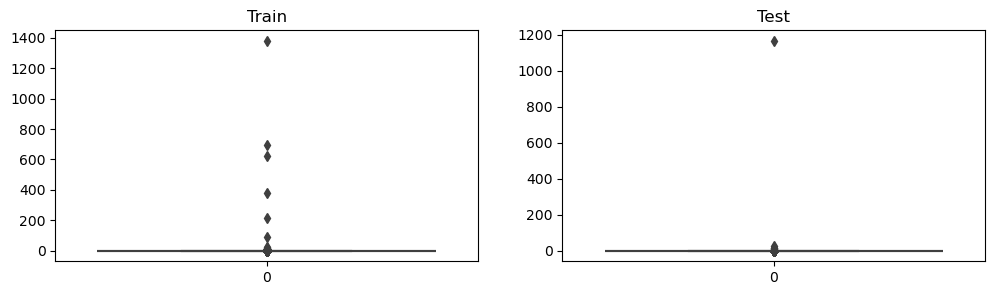

In [16]:
#make subplots
df.src_bytes = df.src_bytes.replace('*',np.nan)
df.src_bytes = df.src_bytes.astype(float)
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.boxplot(df.src_bytes.apply(lambda x: x/1000000),ax=ax[0])
sns.boxplot(df_test.src_bytes.apply(lambda x: x/1000000),ax=ax[1])
#set left title and right title
ax[0].set_title('Train')
ax[1].set_title('Test');

In [17]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'type_of_attack', 'type_of_attack_general'],
      dtype='object')